In [1]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


[1] "brazilian-ecommerce"

In [2]:
library(tidyverse) #cleaning
library(skimr) 
library(ggplot2) #plots
library(lubridate) #clock
library(dplyr) #merge,

My motivation for this dataset is to investigate if there is anything beyond product quality that can affect customer reviews/satisfaction. Some ideas:
* Look at payment types
* Look at date_diff between placing order and receipt date etc
* Market basket analysis
* Price sensitivity analysis
* Average purchase value by category
* Category distirbution bar chart

In [3]:
#read in from CSV
o_reviews <- read_csv("/kaggle/input/brazilian-ecommerce/olist_order_reviews_dataset.csv")

#preview
skim_without_charts(o_reviews)
head(o_reviews)

Rows: 99224 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (4): review_id, order_id, review_comment_title, review_comment_message
dbl  (1): review_score
dttm (2): review_creation_date, review_answer_timestamp

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


,skim_type,skim_variable,n_missing,complete_rate,POSIXct.min,POSIXct.max,POSIXct.median,POSIXct.n_unique,character.min,character.max,character.empty,character.n_unique,character.whitespace,numeric.mean,numeric.sd,numeric.p0,numeric.p25,numeric.p50,numeric.p75,numeric.p100
,<chr>,<chr>,<int>,<dbl>,<dttm>,<dttm>,<dttm>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,POSIXct,review_creation_date,0,1.0000000,2016-10-02 00:00:00,2018-08-31 00:00:00,2018-02-02 00:00:00,636,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,POSIXct,review_answer_timestamp,0,1.0000000,2016-10-07 18:32:28,2018-10-29 12:27:35,2018-02-04 22:41:47,98248,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,character,review_id,0,1.0000000,NA,NA,NA,NA,32,32,0,98410,0,NA,NA,NA,NA,NA,NA,NA
4,character,order_id,0,1.0000000,NA,NA,NA,NA,32,32,0,98673,0,NA,NA,NA,NA,NA,NA,NA
5,character,review_comment_title,87658,0.1165645,NA,NA,NA,NA,1,26,0,4178,0,NA,NA,NA,NA,NA,NA,NA
6,character,review_comment_message,58256,0.4128840,NA,NA,NA,NA,1,208,0,35743,18,NA,NA,NA,NA,NA,NA,NA
7,numeric,review_score,0,1.0000000,NA,NA,NA,NA,NA,NA,NA,NA,NA,4.086421,1.347579,1,4,5,5,5


── Data Summary ────────────────────────
                           Values   
Name                       o_reviews
Number of rows             99224    
Number of columns          7        
_______________________             
Column type frequency:              
  character                4        
  numeric                  1        
  POSIXct                  2        
________________________            
Group variables            None     

── Variable type: character ────────────────────────────────────────────────────
  skim_variable          n_missing complete_rate min max empty n_unique
1 review_id                      0         1      32  32     0    98410
2 order_id                       0         1      32  32     0    98673
3 review_comment_title       87658         0.117   1  26     0     4178
4 review_comment_message     58256         0.413   1 208     0    35743
  whitespace
1          0
2          0
3          0
4         18

── Variable type: numeric ──────────────────

review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
<chr>,<chr>,<dbl>,<chr>,<chr>,<dttm>,<dttm>
7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NA,NA,2018-01-18,2018-01-18 21:46:59
80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NA,NA,2018-03-10,2018-03-11 03:05:13
228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NA,NA,2018-02-17,2018-02-18 14:36:24
e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NA,Recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21 22:02:06
f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NA,Parabéns lojas lannister adorei comprar pela Internet seguro e prático Parabéns a todos feliz Páscoa,2018-03-01,2018-03-02 10:26:53
15197aa66ff4d0650b5434f1b46cda19,b18dcdf73be66366873cd26c5724d1dc,1,NA,NA,2018-04-13,2018-04-16 00:39:37


In [4]:
#cleaning
sum(duplicated(o_reviews))
o_reviews <- o_reviews %>%
    distinct() %>%
    drop_na()
sum(duplicated(o_reviews))

[1] 0

[1] 0

## 2. About reviews

In [5]:
colnames(o_reviews)
sapply(o_reviews,class)

#summarise numerical and date data
o_reviews %>%
    select (review_creation_date, review_score) %>%
    summary()

[1] "review_id"               "order_id"               
[3] "review_score"            "review_comment_title"   
[5] "review_comment_message"  "review_creation_date"   
[7] "review_answer_timestamp"

$review_id
[1] "character"

$order_id
[1] "character"

$review_score
[1] "numeric"

$review_comment_title
[1] "character"

$review_comment_message
[1] "character"

$review_creation_date
[1] "POSIXct" "POSIXt" 

$review_answer_timestamp
[1] "POSIXct" "POSIXt"

 review_creation_date           review_score  
 Min.   :2017-05-16 00:00:00   Min.   :1.000  
 1st Qu.:2018-05-22 00:00:00   1st Qu.:3.000  
 Median :2018-06-27 00:00:00   Median :5.000  
 Mean   :2018-06-27 19:37:40   Mean   :3.837  
 3rd Qu.:2018-08-04 00:00:00   3rd Qu.:5.000  
 Max.   :2018-08-31 00:00:00   Max.   :5.000  

Scale for y is already present.
Adding another scale for y, which will replace the existing scale.


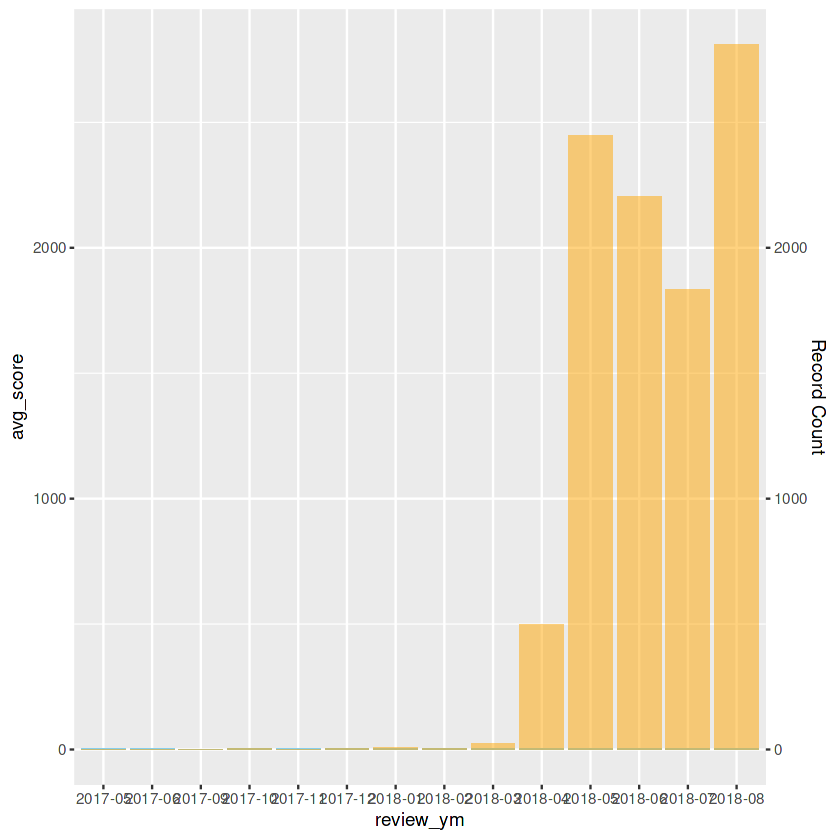

In [6]:
#table for bar graph
o_reviews_avg <- o_reviews %>%
    mutate(review_ym=format(review_creation_date,"%Y-%m")) %>%
    group_by(review_ym) %>%
    summarize(avg_score=mean(review_score,na.rm=TRUE),
             record_count=n())

#bar plot by purchase month
ggplot(data=o_reviews_avg,aes(x=review_ym)) + 
    geom_bar(aes(y=avg_score),stat="identity",fill="skyblue",position="dodge")+
    geom_bar(aes(y=record_count),stat="identity",fill="orange",position="dodge",alpha=.5)+
    scale_y_continuous(name="Average Score",limits=c(0,max(o_reviews_avg$avg_score,na.rm=TRUE)*1.1))+
    scale_y_continuous(sec.axis=sec_axis(~.,name="Record Count"))#,limits=c(0,max(o_reviews_avg$record_count)*1.1)))

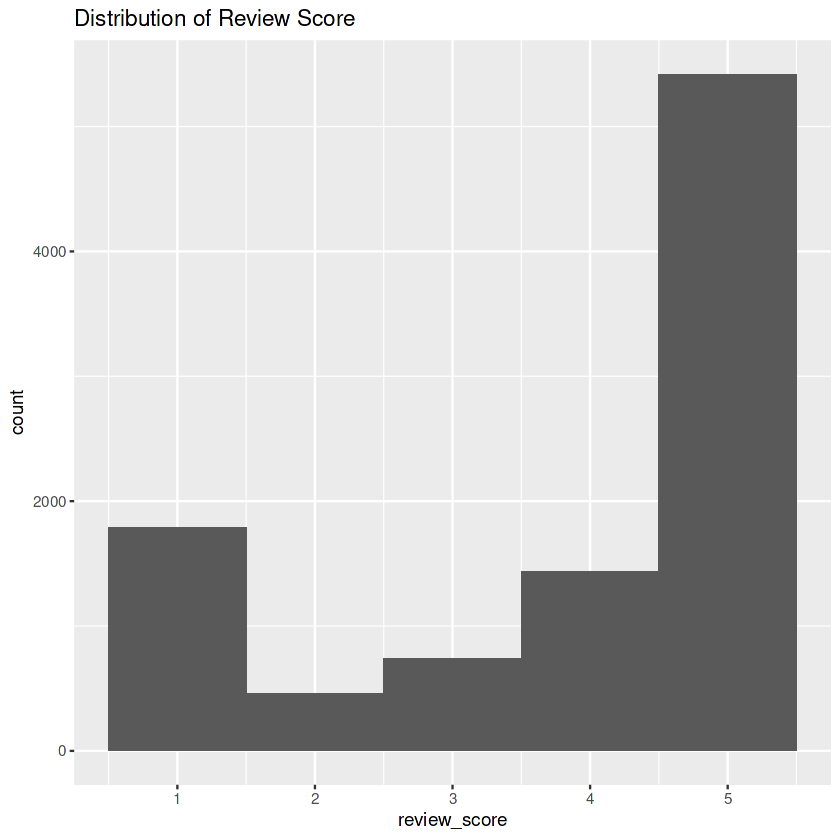

In [7]:
ggplot(o_reviews,aes(x=review_score))+geom_histogram(bins=5)+labs(title="Distribution of Review Score")

## 2. The "Orders" table

The base order table contains columns that join to other informational tables provided in this dataset including customer and product, and contains in itself timestamps including time of purchase, shipment, delivery estimate and receipt. 

In [8]:
o_orders <- read_csv("/kaggle/input/brazilian-ecommerce/olist_orders_dataset.csv") 

#get key table contents summarised
sapply(o_orders,class) 
skim_without_charts(o_orders)
colnames(o_orders)

Rows: 99441 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (3): order_id, customer_id, order_status
dttm (5): order_purchase_timestamp, order_approved_at, order_delivered_carri...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


$order_id
[1] "character"

$customer_id
[1] "character"

$order_status
[1] "character"

$order_purchase_timestamp
[1] "POSIXct" "POSIXt" 

$order_approved_at
[1] "POSIXct" "POSIXt" 

$order_delivered_carrier_date
[1] "POSIXct" "POSIXt" 

$order_delivered_customer_date
[1] "POSIXct" "POSIXt" 

$order_estimated_delivery_date
[1] "POSIXct" "POSIXt"

,skim_type,skim_variable,n_missing,complete_rate,POSIXct.min,POSIXct.max,POSIXct.median,POSIXct.n_unique,character.min,character.max,character.empty,character.n_unique,character.whitespace
,<chr>,<chr>,<int>,<dbl>,<dttm>,<dttm>,<dttm>,<int>,<int>,<int>,<int>,<int>,<int>
1,POSIXct,order_purchase_timestamp,0,1.0000000,2016-09-04 21:15:19,2018-10-17 17:30:18,2018-01-18 23:04:36,98875,NA,NA,NA,NA,NA
2,POSIXct,order_approved_at,160,0.9983910,2016-09-15 12:16:38,2018-09-03 17:40:06,2018-01-19 11:36:13,90733,NA,NA,NA,NA,NA
3,POSIXct,order_delivered_carrier_date,1783,0.9820698,2016-10-08 10:34:01,2018-09-11 19:48:28,2018-01-24 16:10:58,81018,NA,NA,NA,NA,NA
4,POSIXct,order_delivered_customer_date,2965,0.9701833,2016-10-11 13:46:32,2018-10-17 13:22:46,2018-02-02 19:28:10,95664,NA,NA,NA,NA,NA
5,POSIXct,order_estimated_delivery_date,0,1.0000000,2016-09-30 00:00:00,2018-11-12 00:00:00,2018-02-15 00:00:00,459,NA,NA,NA,NA,NA
6,character,order_id,0,1.0000000,NA,NA,NA,NA,32,32,0,99441,0
7,character,customer_id,0,1.0000000,NA,NA,NA,NA,32,32,0,99441,0
8,character,order_status,0,1.0000000,NA,NA,NA,NA,7,11,0,8,0


── Data Summary ────────────────────────
                           Values  
Name                       o_orders
Number of rows             99441   
Number of columns          8       
_______________________            
Column type frequency:             
  character                3       
  POSIXct                  5       
________________________           
Group variables            None    

── Variable type: character ────────────────────────────────────────────────────
  skim_variable n_missing complete_rate min max empty n_unique whitespace
1 order_id              0             1  32  32     0    99441          0
2 customer_id           0             1  32  32     0    99441          0
3 order_status          0             1   7  11     0        8          0

── Variable type: POSIXct ──────────────────────────────────────────────────────
  skim_variable                 n_missing complete_rate min                
1 order_purchase_timestamp              0         1     2016-09

[1] "order_id"                      "customer_id"                  
[3] "order_status"                  "order_purchase_timestamp"     
[5] "order_approved_at"             "order_delivered_carrier_date" 
[7] "order_delivered_customer_date" "order_estimated_delivery_date"

In [9]:
#investigate order_status col
print(table(o_orders$order_status))

#filter to only 'delivered' orders for now
o_orders <- o_orders %>%
    filter(order_status == "delivered") %>%
    mutate(ym=format(order_delivered_customer_date,"%Y-%m")) %>%
    mutate(dd=-1*as.numeric(difftime(order_purchase_timestamp,order_delivered_customer_date,units="days")))


   approved    canceled     created   delivered    invoiced  processing 
          2         625           5       96478         314         301 
    shipped unavailable 
       1107         609 


Warning message:
“Removed 8 rows containing non-finite values (`stat_bin()`).”


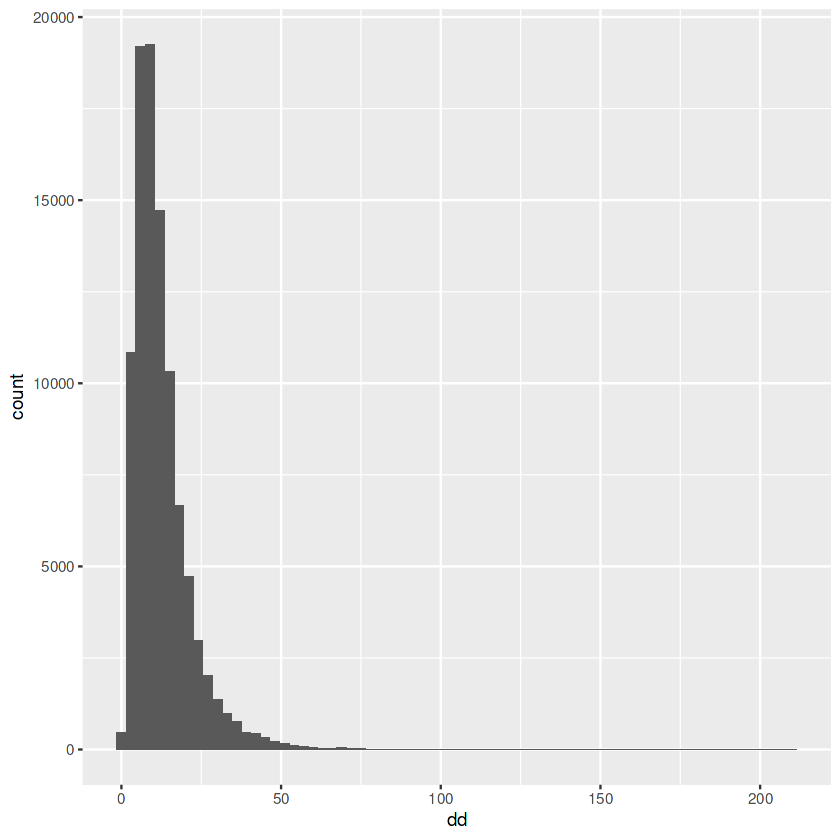

In [10]:
ggplot(data = o_orders, aes(x=dd)) + 
    geom_histogram(binwidth=3)

## Joining tables

Without the other dataframes, besides containing date data the orders table alone is pretty useless without merging with some of the others.

In [11]:
o_items <- read_csv("/kaggle/input/brazilian-ecommerce/olist_order_items_dataset.csv")
o_products <- read_csv("/kaggle/input/brazilian-ecommerce/olist_products_dataset.csv")
category_eng <- read_csv("/kaggle/input/brazilian-ecommerce/product_category_name_translation.csv")
#o_cust
#o_order_payments

Rows: 112650 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (3): order_id, product_id, seller_id
dbl  (3): order_item_id, price, freight_value
dttm (1): shipping_limit_date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 32951 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): product_id, product_category_name
dbl (7): product_name_lenght, product_description_lenght, product_photos_qty...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 71 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): product_category_name, product_category_name_english

ℹ Use `spec()` to retrieve the 

In [12]:
#dplyr package 
merged_orders <- o_orders %>%
    inner_join(o_items) #, by = c("order_id","order_id"))

merged_orders <- merge(merged_orders,o_products,by="product_id")
merged_orders <- merge(merged_orders,category_eng,by="product_category_name")
merged_orders <- merge(merged_orders,o_reviews,by="order_id")

sapply(merged_orders,class)

Joining with `by = join_by(order_id)`


$order_id
[1] "character"

$product_category_name
[1] "character"

$product_id
[1] "character"

$customer_id
[1] "character"

$order_status
[1] "character"

$order_purchase_timestamp
[1] "POSIXct" "POSIXt" 

$order_approved_at
[1] "POSIXct" "POSIXt" 

$order_delivered_carrier_date
[1] "POSIXct" "POSIXt" 

$order_delivered_customer_date
[1] "POSIXct" "POSIXt" 

$order_estimated_delivery_date
[1] "POSIXct" "POSIXt" 

$ym
[1] "character"

$dd
[1] "numeric"

$order_item_id
[1] "numeric"

$seller_id
[1] "character"

$shipping_limit_date
[1] "POSIXct" "POSIXt" 

$price
[1] "numeric"

$freight_value
[1] "numeric"

$product_name_lenght
[1] "numeric"

$product_description_lenght
[1] "numeric"

$product_photos_qty
[1] "numeric"

$product_weight_g
[1] "numeric"

$product_length_cm
[1] "numeric"

$product_height_cm
[1] "numeric"

$product_width_cm
[1] "numeric"

$product_category_name_english
[1] "character"

$review_id
[1] "character"

$review_score
[1] "numeric"

$review_comment_title
[1] "character"

$review_comment_message
[1] "character"

$review_creation_date
[1] "POSIXct" "POSIXt" 

$review_answer_timestamp
[1] "POSIXct" "POSIXt"

In [13]:
#python
#numer = ['price','freight_value','product_photos_qty']
#categ = ['product_category_name']

#numerical
merged_orders %>%
    select (price,freight_value,product_photos_qty,review_score,dd) %>%
    summary()

#categorical
print(table(merged_orders$product_category_name_english))

     price         freight_value    product_photos_qty  review_score  
 Min.   :   0.85   Min.   :  0.00   Min.   : 1.000     Min.   :1.000  
 1st Qu.:  40.00   1st Qu.: 12.86   1st Qu.: 1.000     1st Qu.:3.000  
 Median :  79.00   Median : 18.23   Median : 1.000     Median :5.000  
 Mean   : 129.96   Mean   : 21.88   Mean   : 2.202     Mean   :3.795  
 3rd Qu.: 139.00   3rd Qu.: 23.35   3rd Qu.: 3.000     3rd Qu.:5.000  
 Max.   :4590.00   Max.   :375.28   Max.   :17.000     Max.   :5.000  
                                                                      
       dd         
 Min.   : 0.8925  
 1st Qu.: 5.6188  
 Median : 8.2281  
 Mean   :10.5783  
 3rd Qu.:13.0031  
 Max.   :88.2417  
 NA's   :4        


             agro_industry_and_commerce                        air_conditioning 
                                     15                                      36 
                                    art                   arts_and_craftmanship 
                                     51                                       8 
                                  audio                                    auto 
                                     36                                     533 
                                   baby                          bed_bath_table 
                                    312                                    1158 
                 books_general_interest                          books_imported 
                                     47                                       4 
                        books_technical                       cds_dvds_musicals 
                                     39                                       1 
                     christ

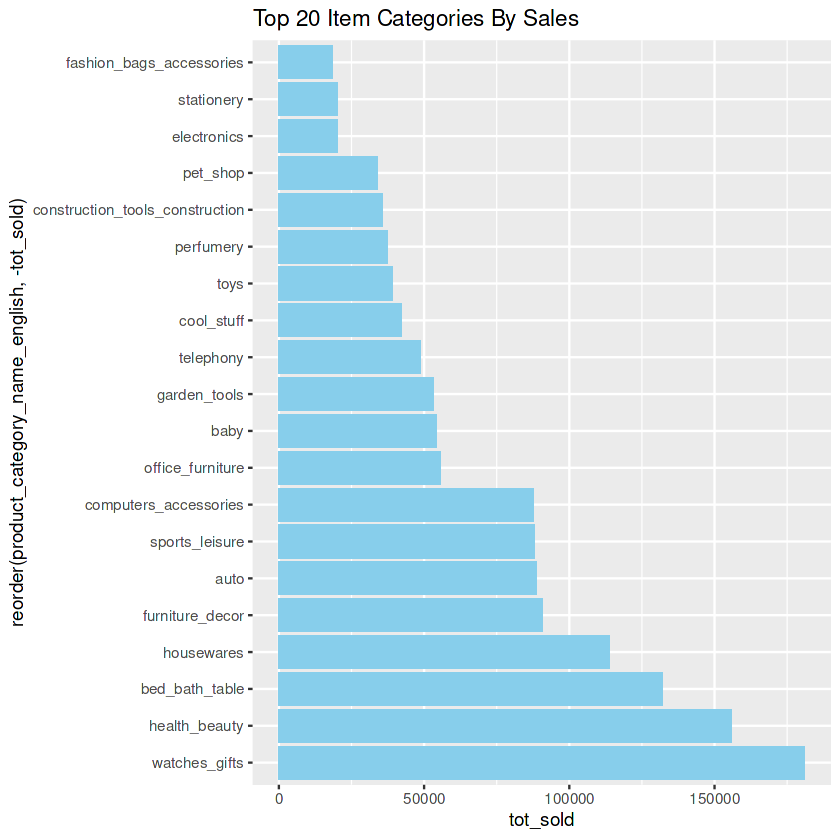

In [14]:
cat_distr <- merged_orders %>%
    group_by(product_category_name_english) %>%
    summarise(purchase_count=n(),
              avg_price=mean(price,na.rm=TRUE),
              avg_freight=mean(freight_value,na.rm=TRUE),
              tot_sold=sum(order_item_id*price)
              ) %>%
    arrange(desc(purchase_count)) %>%
    head(20)

ggplot(cat_distr,aes(x=tot_sold,y=reorder(product_category_name_english,- tot_sold))) + geom_bar(stat="identity",fill="skyblue") + labs(title="Top 20 Item Categories By Sales")